<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #245dd8; color: #FFFFFF;">
    <h1>Statistics II Activity 3 </h1>
</div>


<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Monte Carlo Simulation of rolling two six faced Die  </h1>
</div>

<p align="center">
    <img src="https://raw.githubusercontent.com/pk1308/Activity-2--stat-2/main/Activity3/basic_statsprob_graphik_1.png" alt="Image">
</p>


## Import Packages

In [1]:
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import poisson

<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Monte Carlo Simulation of rolling six faced Fair Die  </h1>
</div>

# Case One - Rolling A fair die


## Simulating One Fair Die Roll and Experimental Probabilities

### Objective
The goal of this code is to simulate rolling a fair six-sided die and calculate experimental probabilities for each outcome.

**Sample Space**:
- When we roll a fair die, the sample space consists of all possible outcomes. Since the die has six faces, the sample space is: {1, 2, 3, 4, 5, 6}.



**Probabilities**:
- We assign probabilities to each outcome. Since the die is fair, each number occurs with equal likelihood. Therefore:
    - The probability follows a **uniform distribution**   $$P(T) = \frac{1}{6} $$.

### Code Explanation
1. **`roll_die()` Function**:
   - This function simulates rolling a fair six-sided die.
   - It returns a random integer between 1 and 6 (inclusive).

2. **`simulate_rolls(num_simulations)` Function**:
   - This function simulates rolling the die multiple times.
   - It generates a list of die rolls based on the specified number of simulations.
   - The results are stored in a dictionary (using `Counter`) to count occurrences of each outcome.

3. **`calculate_probabilities(rolls, num_simulations)` Function**:
   - This function calculates experimental probabilities based on the simulated rolls.
   - It computes the probability of each outcome by dividing the count by the total number of simulations.

4. **`Actual Probabilities`**:
   - Since it's a fair die, the actual probabilities are [1/6, 1/6, 1/6, 1/6, 1/6, 1/6].

5. **`Number of Simulations`**:
   - The code runs simulations for different numbers of trials: 10, 100, and 100,000.

6. **`Data Preparation and Visualization`**:
   - The results are stored in a DataFrame, including the roll number, experimental probability, and number of simulations.
   - A bar plot is created to visualize the experimental probabilities for each roll.
   - The actual probabilities are also plotted as red circles.




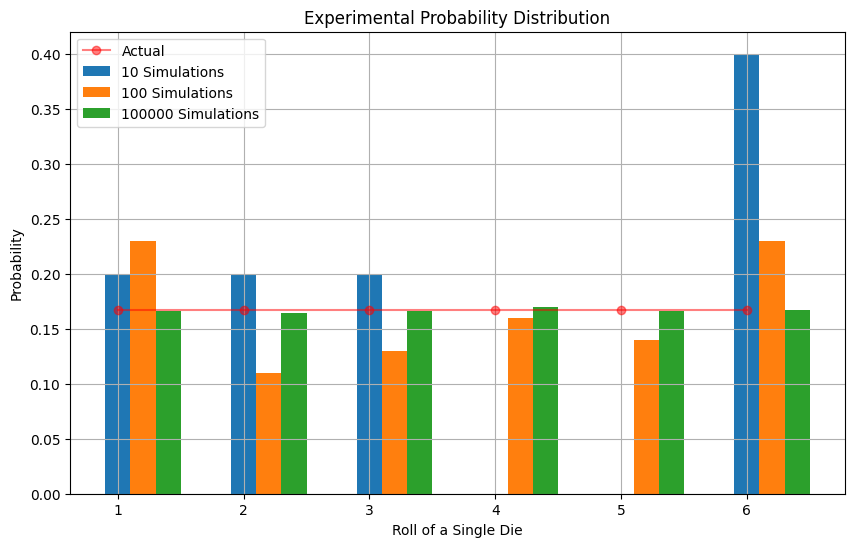

,Sample_Space,theoretical probability,Experimental Probability_10,Experimental Probability_100,Experimental Probability_100000
0,1,0.166667,0.2,0.23,0.16591
1,2,0.166667,0.2,0.11,0.16446
2,3,0.166667,0.2,0.13,0.16634
3,4,0.166667,0.0,0.16,0.16957
4,5,0.166667,0.0,0.14,0.16637
5,6,0.166667,0.4,0.23,0.16735


In [2]:
# Function to simulate rolling a fair six-sided die
def roll_die():
    return random.randint(1, 6)

# Function to simulate rolling the die multiple times
def simulate_rolls(num_simulations):
    rolls = [roll_die() for _ in range(num_simulations)]
    return Counter(rolls)

# Function to calculate experimental probabilities
def calculate_probabilities(rolls, num_simulations):
    probabilities = {key: value / num_simulations for key, value in rolls.items()}
    return probabilities

# Actual probabilities (since it's a fair die)
actual_probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Number of simulations
num_simulations_list = [10, 100, 100000]

# Prepare an empty DataFrame to store the probabilities
dfs = []

for num_simulations in num_simulations_list:
    # Simulate rolls
    rolls = simulate_rolls(num_simulations)

    # Calculate experimental probabilities
    probabilities = calculate_probabilities(rolls, num_simulations)

    # Prepare data for DataFrame
    data = {'Sample_Space': list(range(1, 7)),
            f'Experimental Probability_{num_simulations}': [probabilities.get(roll, 0) for roll in range(1, 7)]}

    # Create DataFrame
    df = pd.DataFrame(data)
    dfs.append(df)

# Merge DataFrames
result_df = dfs[0]
for df in dfs[1:]:
    result_df = pd.merge(result_df, df, on='Sample_Space')
result_df["theoretical probability"] =  actual_probabilities
# Plot the data
plt.figure(figsize=(10, 6))
bar_width = 0.2
for num_simulations in num_simulations_list:
    plt.bar(result_df['Sample_Space'] + num_simulations_list.index(num_simulations) * bar_width, result_df[f'Experimental Probability_{num_simulations}'], label=f'{num_simulations} Simulations', width=bar_width)

plt.plot(range(1, 7), actual_probabilities, 'ro-', label='Actual', alpha=0.5)
plt.xlabel('Roll of a Single Die')
plt.ylabel('Probability')
plt.title('Experimental Probability Distribution')
plt.xticks(range(1, 7))
plt.legend()
plt.grid(True)
plt.show()

result_df=  result_df.reindex(columns=['Sample_Space',
       'theoretical probability','Experimental Probability_10', 'Experimental Probability_100',
       'Experimental Probability_100000'])
result_df


<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Monte Carlo Simulation of rolling sum of two  six faced Fair Die  </h1>
</div>

## Simulating Two Fair Dice Rolls and Experimental Probabilities

### Objective
The objective of this code is to simulate rolling two fair six-sided dice and calculate experimental probabilities for each possible sum of the two dice.

### Sample Space
When rolling two fair dice, the sample space consists of all possible sums of their outcomes, ranging from 2 to 12.

### Probabilities
- The theoretical probabilities for each sum of two dice follow a triangular distribution:
- Sum of 2: 1 way to roll (1 + 1) - Probability: \(1/36\)
- Sum of 3: 2 ways to roll (1 + 2, 2 + 1) - Probability: \(2/36\)
- Sum of 4: 3 ways to roll (1 + 3, 2 + 2, 3 + 1) - Probability: \(3/36\)
- Sum of 5: 4 ways to roll (1 + 4, 2 + 3, 3 + 2, 4 + 1) - Probability: \(4/36\)
- Sum of 6: 5 ways to roll (1 + 5, 2 + 4, 3 + 3, 4 + 2, 5 + 1) - Probability: \(5/36\)
- Sum of 7: 6 ways to roll (1 + 6, 2 + 5, 3 + 4, 4 + 3, 5 + 2, 6 + 1) - Probability: \(6/36\)
- Sum of 8: 5 ways to roll (2 + 6, 3 + 5, 4 + 4, 5 + 3, 6 + 2) - Probability: \(5/36\)
- Sum of 9: 4 ways to roll (3 + 6, 4 + 5, 5 + 4, 6 + 3) - Probability: \(4/36\)
- Sum of 10: 3 ways to roll (4 + 6, 5 + 5, 6 + 4) - Probability: \(3/36\)
- Sum of 11: 2 ways to roll (5 + 6, 6 + 5) - Probability: \(2/36\)
- Sum of 12: 1 way to roll (6 + 6) - Probability: \(1/36\)

### Code Explanation
1. **`roll_two_dice()` Function**:
   - Simulates rolling two fair six-sided dice and returns their sum.

2. **`simulate_rolls(num_simulations)` Function**:
   - Simulates rolling two dice multiple times and counts the occurrences of each sum.

3. **`calculate_probabilities(rolls, num_simulations)` Function**:
   - Calculates the experimental probabilities for each sum of two dice based on the simulated rolls.

4. **Actual Probabilities**:
   - The actual probabilities are calculated based on the theoretical probabilities described above.

5. **Number of Simulations**:
   - The code runs simulations for different numbers of trials: 10, 100, and 100,000.

6. **Data Preparation and Visualization**:
   - The experimental probabilities for each sum of two dice are stored in a DataFrame.
   - A bar plot is created to visualize the experimental probabilities for each sum, along with the actual probabilities.


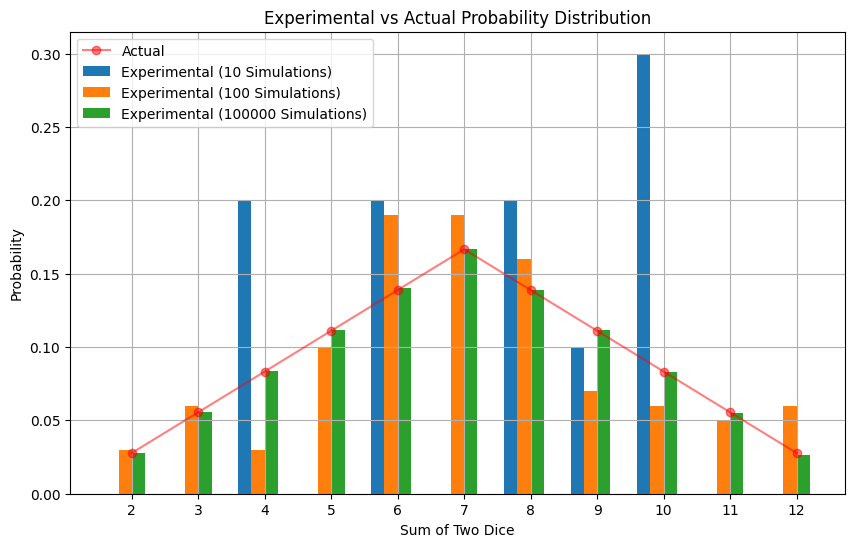

,Sample_ Space,theoretical probability,Experimental Probability (10 Simulations),Experimental Probability (100 Simulations),Experimental Probability (100000 Simulations)
0,2,0.027778,0.0,0.03,0.02793
1,3,0.055556,0.0,0.06,0.05582
2,4,0.083333,0.2,0.03,0.08340
3,5,0.111111,0.0,0.10,0.11141
4,6,0.138889,0.2,0.19,0.14016
5,7,0.166667,0.0,0.19,0.16669
6,8,0.138889,0.2,0.16,0.13870
7,9,0.111111,0.1,0.07,0.11138
8,10,0.083333,0.3,0.06,0.08325
9,11,0.055556,0.0,0.05,0.05506


In [3]:

def roll_two_dice():
    """Simulates rolling two six-sided dice and returns their sum."""
    return random.randint(1, 6) + random.randint(1, 6)

def simulate_rolls(num_simulations):
    """Simulates rolling two dice multiple times and counts the occurrences of each sum."""
    rolls = [roll_two_dice() for _ in range(num_simulations)]
    return Counter(rolls)

def calculate_probabilities(rolls, num_simulations):
    """Calculates the experimental probabilities for each sum of two dice."""
    probabilities = {key: value / num_simulations for key, value in rolls.items()}
    return probabilities

# Actual probabilities (since it's the sum of two fair six-sided dice)
actual_probabilities = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]

# Number of simulations
num_simulations_list = [10, 100, 100000]

# Prepare an empty DataFrame to store all experimental probabilities
df_list = []

# Generate data for each set of simulations
for num_simulations in num_simulations_list:
    # Simulate rolls
    rolls = simulate_rolls(num_simulations)

    # Calculate probabilities
    probabilities = calculate_probabilities(rolls, num_simulations)

    # Convert probabilities to DataFrame
    df = pd.DataFrame({'Sum of Two Dice': list(range(2, 13)),
                       f'Experimental Probability ({num_simulations} Simulations)': [probabilities.get(i, 0) for i in range(2, 13)]})

    # Append DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames
result_df = pd.concat(df_list, axis=1)

# Plot the experimental and actual probabilities as bar charts
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(2, 13)
for i, num_simulations in enumerate(num_simulations_list):
    plt.bar(x + i * bar_width,
            result_df[f'Experimental Probability ({num_simulations} Simulations)'],
            width=bar_width,
            label=f'Experimental ({num_simulations} Simulations)')

plt.plot(x + bar_width * len(num_simulations_list) / 2, actual_probabilities, 'ro-', label='Actual', alpha=0.5)

plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.title('Experimental vs Actual Probability Distribution')
plt.legend()
plt.grid(True)
plt.xticks(x + bar_width * len(num_simulations_list) / 2, x)
plt.show()
result_df["Sample_ Space"] = result_df.iloc[:,0]
result_df.drop(["Sum of Two Dice"] , axis=1 , inplace = True )
result_df[" theoretical probability"] = actual_probabilities
result_df=  result_df.reindex(columns=['Sample_ Space',
       ' theoretical probability','Experimental Probability (10 Simulations)',
       'Experimental Probability (100 Simulations)',
       'Experimental Probability (100000 Simulations)'])
result_df


<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Monte Carlo Simulation of max rolling two  six faced Fair Die  </h1>
</div>

## Simulating Two Fair Dice Rolls and Experimental Probabilities

### Objective
The objective of this code is to simulate rolling two fair six-sided dice and calculate experimental probabilities for the maximum outcome of the two dice.

### Sample Space
When rolling two fair dice, the sample space consists of all possible outcomes, ranging from 1 to 6 for each die.

### Probabilities
- The theoretical probabilities for the maximum outcome of two fair dice are as follows:

  - Max Outcome of 1: Probability = \(1/36\)
  - Max Outcome of 2: Probability = \(3/36\)
  - Max Outcome of 3: Probability = \(5/36\)
  - Max Outcome of 4: Probability = \(7/36\)
  - Max Outcome of 5: Probability = \(9/36\)
  - Max Outcome of 6: Probability = \(11/36\)

### Code Explanation
1. **`roll_two_dice()` Function**:
   - Simulates rolling two fair six-sided dice and returns their outcomes.

2. **`max_outcome(first_die, second_die)` Function**:
   - Returns the maximum outcome from two dice.

3. **`simulate_rolls(num_simulations)` Function**:
   - Simulates rolling two dice and calculates the maximum outcome.

4. **`calculate_probabilities(rolls, num_simulations)` Function**:
   - Calculates the experimental probabilities for each maximum outcome.

5. **Actual Probabilities**:
   - The actual probabilities are [1/36, 3/36, 5/36, 7/36, 9/36, 11/36] for max outcomes 1 through 6, respectively.

6. **Number of Simulations**:
   - The simulations are performed for different numbers of trials: 10, 100, and 10,000.

7. **Data Preparation and Visualization**:
   - The experimental probabilities for each maximum outcome are stored in DataFrames.
   - Bar plots are created to visualize the experimental probabilities for each maximum outcome, along with the actual probabilities.


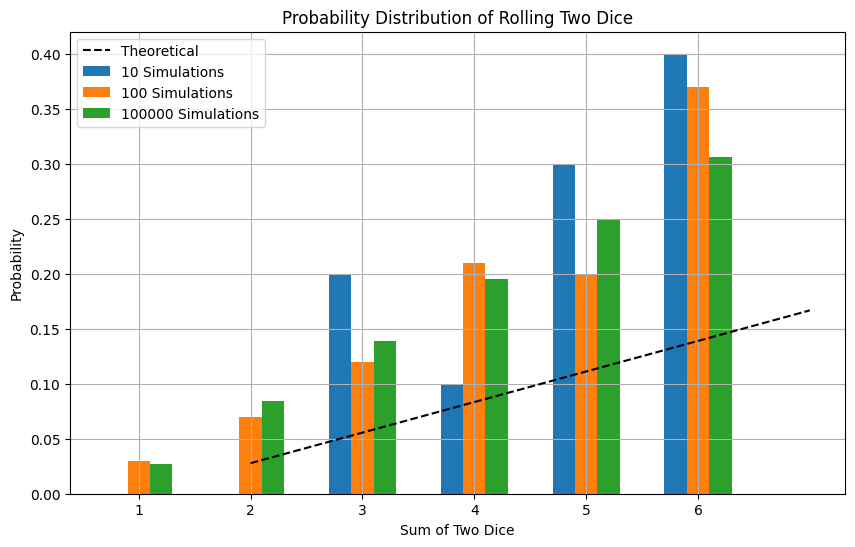

,Sample Space,theoretical probability,Experimental Probability (10 Simulations),Experimental Probability (100 Simulations),Experimental Probability (100000 Simulations)
0,1,0.027778,0.0,0.03,0.02736
1,2,0.055556,0.0,0.07,0.08404
2,3,0.083333,0.2,0.12,0.13924
3,4,0.111111,0.1,0.21,0.19483
4,5,0.138889,0.3,0.20,0.24874
5,6,0.166667,0.4,0.37,0.30579


In [4]:
def roll_two_dice():
    """Simulates rolling two six-sided dice and returns their outcomes."""
    return random.randint(1, 6), random.randint(1, 6)

def max_outcome(first_die, second_die):
    """Returns the maximum outcome from two dice."""
    return max(first_die, second_die)

def simulate_rolls(num_simulations):
    """Simulates rolling two dice and calculates the maximum outcome."""
    rolls = [max_outcome(*roll_two_dice()) for _ in range(num_simulations)]
    return Counter(rolls)

def calculate_probabilities(rolls, num_simulations):
    """Calculates the experimental probabilities for each maximum outcome."""
    probabilities = {key: value / num_simulations for key, value in rolls.items()}
    return probabilities

def create_dataframe(rolls, num_simulations):
    """Creates a DataFrame with experimental probabilities for each maximum outcome."""
    probabilities = calculate_probabilities(rolls, num_simulations)
    sample_space = list(range(1, 7))
    df = pd.DataFrame({'Sample Space': sample_space,
                       f'Experimental Probability ({num_simulations} Simulations)': [probabilities.get(i, 0) for i in sample_space]})
    return df

# Number of simulations
num_simulations_list = [10, 100, 100000]

# Empty list to store DataFrames
dfs = []

# Perform simulations, create DataFrame, and store in list
for num_simulations in num_simulations_list:
    rolls = simulate_rolls(num_simulations)
    df = create_dataframe(rolls, num_simulations)
    dfs.append(df)

# Concatenate DataFrames
result_df = pd.concat(dfs, axis=1)
output = result_df[['Sample Space', 'Experimental Probability (10 Simulations)',
       'Experimental Probability (100 Simulations)', 'Experimental Probability (100000 Simulations)']].iloc[: , 2:]

# Define theoretical probabilities
theoretical_probabilities = pd.Series([1/36, 2/36, 3/36, 4/36, 5/36, 6/36])

# Add theoretical probabilities to the output DataFrame
output["theoretical probability"] = theoretical_probabilities

# Reorder the columns
output = output.reindex(columns=['Sample Space', 'theoretical probability',
                                 'Experimental Probability (10 Simulations)',
                                 'Experimental Probability (100 Simulations)',
                                 'Experimental Probability (100000 Simulations)'])

# Plotting
plt.figure(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.2

# Set the positions for the bars
bar_positions = np.arange(len(output['Sample Space']))

# Plotting experimental probabilities
plt.bar(bar_positions - bar_width, output['Experimental Probability (10 Simulations)'],
        width=bar_width, label='10 Simulations')
plt.bar(bar_positions, output['Experimental Probability (100 Simulations)'],
        width=bar_width, label='100 Simulations')
plt.bar(bar_positions + bar_width, output['Experimental Probability (100000 Simulations)'],
        width=bar_width, label='100000 Simulations')

# Plotting theoretical probabilities
plt.plot(output['Sample Space'], output["theoretical probability"], '--', color='black', label='Theoretical')

plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.title('Probability Distribution of Rolling Two Dice')
plt.xticks(bar_positions, output['Sample Space'])
plt.legend()
plt.grid(True)

plt.show()
output


<div style="display: flex; justify-content: center; align-items: center; height: 100px; background-color: #103db7; color: #FFFFFF;">
    <h1>Monte Carlo Simulation of Min rolling two six faced Fair Die  </h1>
</div>

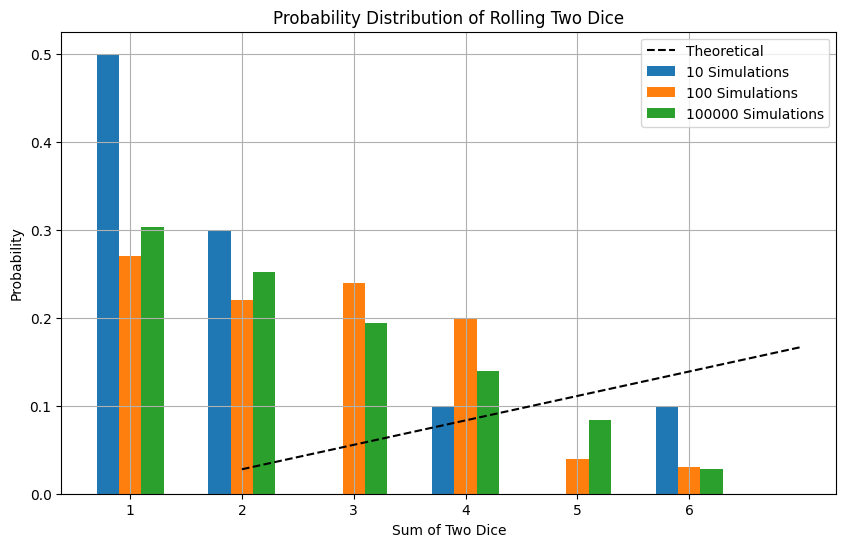

,Sample Space,theoretical probability,Experimental Probability (10 Simulations),Experimental Probability (100 Simulations),Experimental Probability (100000 Simulations)
0,1,0.027778,0.5,0.27,0.30308
1,2,0.055556,0.3,0.22,0.25167
2,3,0.083333,0.0,0.24,0.19388
3,4,0.111111,0.1,0.20,0.13985
4,5,0.138889,0.0,0.04,0.08392
5,6,0.166667,0.1,0.03,0.02760


In [5]:
def roll_two_dice():
    """Simulates rolling two six-sided dice and returns their outcomes."""
    return random.randint(1, 6), random.randint(1, 6)

def min_outcome(first_die, second_die):
    """Returns the maximum outcome from two dice."""
    return min(first_die, second_die)

def simulate_rolls(num_simulations):
    """Simulates rolling two dice and calculates the maximum outcome."""
    rolls = [min_outcome(*roll_two_dice()) for _ in range(num_simulations)]
    return Counter(rolls)

def calculate_probabilities(rolls, num_simulations):
    """Calculates the experimental probabilities for each maximum outcome."""
    probabilities = {key: value / num_simulations for key, value in rolls.items()}
    return probabilities

def create_dataframe(rolls, num_simulations):
    """Creates a DataFrame with experimental probabilities for each maximum outcome."""
    probabilities = calculate_probabilities(rolls, num_simulations)
    sample_space = list(range(1, 7))
    df = pd.DataFrame({'Sample Space': sample_space,
                       f'Experimental Probability ({num_simulations} Simulations)': [probabilities.get(i, 0) for i in sample_space]})
    return df

# Number of simulations
num_simulations_list = [10, 100, 100000]

# Empty list to store DataFrames
dfs = []

# Perform simulations, create DataFrame, and store in list
for num_simulations in num_simulations_list:
    rolls = simulate_rolls(num_simulations)
    df = create_dataframe(rolls, num_simulations)
    dfs.append(df)

# Concatenate DataFrames
result_df = pd.concat(dfs, axis=1)
output = result_df[['Sample Space', 'Experimental Probability (10 Simulations)',
       'Experimental Probability (100 Simulations)', 'Experimental Probability (100000 Simulations)']].iloc[: , 2:]

# Define theoretical probabilities
theoretical_probabilities = pd.Series([1/36, 2/36, 3/36, 4/36, 5/36, 6/36])

# Add theoretical probabilities to the output DataFrame
output["theoretical probability"] = theoretical_probabilities

# Reorder the columns
output = output.reindex(columns=['Sample Space', 'theoretical probability',
                                 'Experimental Probability (10 Simulations)',
                                 'Experimental Probability (100 Simulations)',
                                 'Experimental Probability (100000 Simulations)'])

# Plotting
plt.figure(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.2

# Set the positions for the bars
bar_positions = np.arange(len(output['Sample Space']))

# Plotting experimental probabilities
plt.bar(bar_positions - bar_width, output['Experimental Probability (10 Simulations)'],
        width=bar_width, label='10 Simulations')
plt.bar(bar_positions, output['Experimental Probability (100 Simulations)'],
        width=bar_width, label='100 Simulations')
plt.bar(bar_positions + bar_width, output['Experimental Probability (100000 Simulations)'],
        width=bar_width, label='100000 Simulations')

# Plotting theoretical probabilities
plt.plot(output['Sample Space'], output["theoretical probability"], '--', color='black', label='Theoretical')

plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.title('Probability Distribution of Rolling Two Dice')
plt.xticks(bar_positions, output['Sample Space'])
plt.legend()
plt.grid(True)

plt.show()
output


In [2]:
import numpy as np

# Generating random data for X (hours of study) and Y (exam scores)
np.random.seed(0)
hours_of_study = np.random.randint(1, 10, 100)  # Generating 100 random hours of study
exam_scores = np.random.randint(50, 100, 100)   # Generating 100 random exam scores

# Calculating covariance
covariance = np.cov(hours_of_study, exam_scores)[0, 1]

print("Covariance between hours of study and exam scores:", covariance)


Covariance between hours of study and exam scores: -4.968080808080809
